# Top Content Popularity Analysis of Social Buzz


*Notes : This notebook is prepared to provide insights into the content categories of Social Buzz, highlighting the top 5 categories with the highest aggregate popularity.*

*Prepared by* : **Faris Arief Mawardi**

## **I. Introduction**

### **Project Background**

Social Buzz, a dynamic player in the social media and content creation industry, has revolutionized the way content is consumed and interacted with online. Established in 2010 and headquartered in San Francisco, the platform was the brainchild of two visionary engineers who sought to shift the focus from the content creators to the content itself. Social Buzz stands out in the digital landscape for its unique approach to user interaction, offering over 100 different ways for users to react to content, which ranges from text and images to videos and GIFs. This innovation has propelled the platform to impressive heights, amassing over 500 million active users monthly. With a workforce of 250, predominantly composed of technical staff, Social Buzz has managed its rapid expansion and the complexities of handling vast amounts of unstructured data without external assistance. Now, as the company prepares for an IPO and faces the challenges of scaling at such a massive extent, it seeks external expertise to refine its data strategies and ensure a smooth transition during this pivotal phase.

### **Introduction**

As Social Buzz embarks on a critical juncture of its growth trajectory, the need for an in-depth understanding of its data infrastructure and content dynamics has never been more pressing. The company's success hinges not only on its technological prowess but also on its ability to leverage the massive amounts of user interaction data to drive content strategy and user engagement. This project, spearheaded by an experienced advisory firm, aims to provide comprehensive support to Social Buzz in three main areas: conducting an audit of its big data practices, offering strategic guidance for its upcoming IPO, and most crucially, performing a detailed analysis of the platform's content categories to determine the top five categories in terms of aggregate popularity. This analysis will serve as a cornerstone in understanding user preferences and guiding content strategy, ensuring that Social Buzz continues to thrive in the competitive landscape of social media.

### **Problem Statement**

The primary challenge facing Social Buzz is the need to distill actionable insights from its extensive and diverse user data, particularly in understanding which content categories resonate most profoundly with its user base. The objective of this project is to analyze the vast data repository of Social Buzz, focusing specifically on identifying the top 5 content categories that command the highest levels of engagement and popularity. This analysis is critical for several reasons: it will inform content curation and development strategies, enhance user experience by tailoring content to preferences, and provide crucial insights for the company as it prepares for a public offering. By unlocking the patterns and preferences embedded in user interactions, Social Buzz can not only optimize its current operations but also strategically position itself for future growth and innovation.

## **II. Data Loading**

**In this section, we load the datasets that must be cleaned for the content popularity analysis.**

In [136]:
# Import pandas library for importing and manipulating/alternating datas
import pandas as pd

**1.1 Content Dataset**

In [137]:
# Load the content datasets
content = pd.read_csv('Content.csv',delimiter=',')
content

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...
...,...,...,...,...,...,...
995,995,b4cef9ef-627b-41d7-a051-5961b0204ebb,5b62e10e-3c19-4d28-a57c-e9bdc3d6758d,video,public speaking,NaN
996,996,7a79f4e4-3b7d-44dc-bdef-bc990740252c,4fe420fa-a193-4408-bd5d-62a020233609,GIF,technology,https://socialbuzz.cdn.com/content/storage/7a7...
997,997,435007a5-6261-4d8b-b0a4-55fdc189754b,35d6a1f3-e358-4d4b-8074-05f3b7f35c2a,audio,veganism,https://socialbuzz.cdn.com/content/storage/435...
998,998,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,b9bcd994-f000-4f6b-87fc-caae08acfaa1,GIF,culture,https://socialbuzz.cdn.com/content/storage/4e4...


In [138]:
content = content.rename(columns = {'Type' : 'Content_Type'})

In [139]:
content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    1000 non-null   int64 
 1   Content ID    1000 non-null   object
 2   User ID       1000 non-null   object
 3   Content_Type  1000 non-null   object
 4   Category      1000 non-null   object
 5   URL           801 non-null    object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [140]:
# Dropping the unnamed column (redundant column)
drop = [0,5] # initiate a variable to drop the unnamed column with index 0
content = content.drop(columns=content.columns[drop]) # Initiating to drop the column mentioned 
content.info() # Rechecking the columns contained in the content datasets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Content ID    1000 non-null   object
 1   User ID       1000 non-null   object
 2   Content_Type  1000 non-null   object
 3   Category      1000 non-null   object
dtypes: object(4)
memory usage: 31.4+ KB


In [141]:
missing_content = content.isnull().sum()
missing_content

Content ID      0
User ID         0
Content_Type    0
Category        0
dtype: int64

In [142]:
content

,Content ID,User ID,Content_Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food
...,...,...,...,...
995,b4cef9ef-627b-41d7-a051-5961b0204ebb,5b62e10e-3c19-4d28-a57c-e9bdc3d6758d,video,public speaking
996,7a79f4e4-3b7d-44dc-bdef-bc990740252c,4fe420fa-a193-4408-bd5d-62a020233609,GIF,technology
997,435007a5-6261-4d8b-b0a4-55fdc189754b,35d6a1f3-e358-4d4b-8074-05f3b7f35c2a,audio,veganism
998,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,b9bcd994-f000-4f6b-87fc-caae08acfaa1,GIF,culture


In [143]:
content.to_csv('cleaned_content.csv',index=False)

**1.2 Reactions Dataset**

In [144]:
# Load the reactions dataset
reactions = pd.read_csv('Reactions.csv',delimiter=',')
reactions

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01
...,...,...,...,...,...
25548,25548,75d6b589-7fae-4a6d-b0d0-752845150e56,80c9ce48-46f9-4f5e-b3ca-3b698fc2e949,dislike,2020-06-27 09:46:48
25549,25549,75d6b589-7fae-4a6d-b0d0-752845150e56,2bd9c167-e06c-47c1-a978-3403d6724606,intrigued,2021-02-16 17:17:02
25550,25550,75d6b589-7fae-4a6d-b0d0-752845150e56,NaN,interested,2020-09-12 03:54:58
25551,25551,75d6b589-7fae-4a6d-b0d0-752845150e56,5ffd8b51-164e-47e2-885e-8b8c46eb63ed,worried,2020-11-04 20:08:31


In [145]:
reactions = reactions.rename(columns={'Type' : 'Reactions_Type'})
reactions

,Unnamed: 0,Content ID,User ID,Reactions_Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01
...,...,...,...,...,...
25548,25548,75d6b589-7fae-4a6d-b0d0-752845150e56,80c9ce48-46f9-4f5e-b3ca-3b698fc2e949,dislike,2020-06-27 09:46:48
25549,25549,75d6b589-7fae-4a6d-b0d0-752845150e56,2bd9c167-e06c-47c1-a978-3403d6724606,intrigued,2021-02-16 17:17:02
25550,25550,75d6b589-7fae-4a6d-b0d0-752845150e56,NaN,interested,2020-09-12 03:54:58
25551,25551,75d6b589-7fae-4a6d-b0d0-752845150e56,5ffd8b51-164e-47e2-885e-8b8c46eb63ed,worried,2020-11-04 20:08:31


In [146]:
reactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25553 entries, 0 to 25552
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      25553 non-null  int64 
 1   Content ID      25553 non-null  object
 2   User ID         22534 non-null  object
 3   Reactions_Type  24573 non-null  object
 4   Datetime        25553 non-null  object
dtypes: int64(1), object(4)
memory usage: 998.3+ KB


In [147]:
# Dropping the unnamed column (redundant column)
drop = [0] # initiate a variable to drop the unnamed column with index 0
reactions = reactions.drop(columns=reactions.columns[drop]) # Initiating to drop the column mentioned 
reactions.info() # Rechecking the columns contained in the reactions datasets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25553 entries, 0 to 25552
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Content ID      25553 non-null  object
 1   User ID         22534 non-null  object
 2   Reactions_Type  24573 non-null  object
 3   Datetime        25553 non-null  object
dtypes: object(4)
memory usage: 798.7+ KB


In [148]:
reactions

,Content ID,User ID,Reactions_Type,Datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01
...,...,...,...,...
25548,75d6b589-7fae-4a6d-b0d0-752845150e56,80c9ce48-46f9-4f5e-b3ca-3b698fc2e949,dislike,2020-06-27 09:46:48
25549,75d6b589-7fae-4a6d-b0d0-752845150e56,2bd9c167-e06c-47c1-a978-3403d6724606,intrigued,2021-02-16 17:17:02
25550,75d6b589-7fae-4a6d-b0d0-752845150e56,NaN,interested,2020-09-12 03:54:58
25551,75d6b589-7fae-4a6d-b0d0-752845150e56,5ffd8b51-164e-47e2-885e-8b8c46eb63ed,worried,2020-11-04 20:08:31


In [149]:
missing_reactions = reactions.isnull().sum()
missing_reactions

Content ID           0
User ID           3019
Reactions_Type     980
Datetime             0
dtype: int64

In [150]:
reactions = reactions.dropna()
reactions

,Content ID,User ID,Reactions_Type,Datetime
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,9b6d35f9-5e15-4cd0-a8d7-b1f3340e02c4,interested,2020-08-23 12:25:58
...,...,...,...,...
25547,75d6b589-7fae-4a6d-b0d0-752845150e56,b6d04982-1509-41ab-a700-b390d6cb4d02,worried,2020-10-31 04:50:14
25548,75d6b589-7fae-4a6d-b0d0-752845150e56,80c9ce48-46f9-4f5e-b3ca-3b698fc2e949,dislike,2020-06-27 09:46:48
25549,75d6b589-7fae-4a6d-b0d0-752845150e56,2bd9c167-e06c-47c1-a978-3403d6724606,intrigued,2021-02-16 17:17:02
25551,75d6b589-7fae-4a6d-b0d0-752845150e56,5ffd8b51-164e-47e2-885e-8b8c46eb63ed,worried,2020-11-04 20:08:31


In [151]:
reactions.to_csv('cleaned_reactions.csv',index=False)

**1.3 ReactionTypes Dataset**

In [152]:
# Load the ReactionTypes dataset
rtypes = pd.read_csv('ReactionTypes.csv',delimiter=',')
rtypes

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30
5,5,indifferent,neutral,20
6,6,love,positive,65
7,7,super love,positive,75
8,8,cherish,positive,70
9,9,adore,positive,72


In [153]:
rtypes = rtypes.rename(columns={'Type':'Reactions_Type'})
rtypes

,Unnamed: 0,Reactions_Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30
5,5,indifferent,neutral,20
6,6,love,positive,65
7,7,super love,positive,75
8,8,cherish,positive,70
9,9,adore,positive,72


In [154]:
# Dropping the unnamed column (redundant column)
drop = [0] # initiate a variable to drop the unnamed column with index 0
rtypes = rtypes.drop(columns=rtypes.columns[drop]) # Initiating to drop the column mentioned 
rtypes.info() # Rechecking the columns contained in the reactions datasets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Reactions_Type  16 non-null     object
 1   Sentiment       16 non-null     object
 2   Score           16 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 516.0+ bytes


In [155]:
rtypes

,Reactions_Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30
5,indifferent,neutral,20
6,love,positive,65
7,super love,positive,75
8,cherish,positive,70
9,adore,positive,72


In [156]:
rtypes.to_csv('cleaned_rtypes.csv',index=False)

The datasets were successfully loaded and we will concatenate/merge the datasets into a final datasets that will be used to perform a further required analysis. The desired final datasets will include features/columns :

1. Content ID in content dataset
2. User ID in content dataset
3. Content_Type in content dataset
4. Category	in content dataset
5. Reactions_Type in reactions dataset
6. Score in rtypes dataset

Next -> Merging the datasets

**1.4 Merging Datasets**

In [157]:
# Print every columns in each datasets
print('content columns :')
print(content.columns)
print('\n')
print('reactions columns :')
print(reactions.columns)
print('\n')
print('rtypes columns :')
print(rtypes.columns)

content columns :
Index(['Content ID', 'User ID', 'Content_Type', 'Category'], dtype='object')


reactions columns :
Index(['Content ID', 'User ID', 'Reactions_Type', 'Datetime'], dtype='object')


rtypes columns :
Index(['Reactions_Type', 'Sentiment', 'Score'], dtype='object')


In [158]:
# Merge reactions with rtypes
merged = pd.merge(reactions[['Content ID', 'User ID', 'Reactions_Type', 'Datetime']], 
                  rtypes[['Reactions_Type', 'Sentiment', 'Score']], 
                  on='Reactions_Type', 
                  how='left')
merged

,Content ID,User ID,Reactions_Type,Datetime,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,9b6d35f9-5e15-4cd0-a8d7-b1f3340e02c4,interested,2020-08-23 12:25:58,positive,30
...,...,...,...,...,...,...
22529,75d6b589-7fae-4a6d-b0d0-752845150e56,b6d04982-1509-41ab-a700-b390d6cb4d02,worried,2020-10-31 04:50:14,negative,12
22530,75d6b589-7fae-4a6d-b0d0-752845150e56,80c9ce48-46f9-4f5e-b3ca-3b698fc2e949,dislike,2020-06-27 09:46:48,negative,10
22531,75d6b589-7fae-4a6d-b0d0-752845150e56,2bd9c167-e06c-47c1-a978-3403d6724606,intrigued,2021-02-16 17:17:02,positive,45
22532,75d6b589-7fae-4a6d-b0d0-752845150e56,5ffd8b51-164e-47e2-885e-8b8c46eb63ed,worried,2020-11-04 20:08:31,negative,12


In [159]:
merged.info()
merged.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22534 entries, 0 to 22533
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Content ID      22534 non-null  object
 1   User ID         22534 non-null  object
 2   Reactions_Type  22534 non-null  object
 3   Datetime        22534 non-null  object
 4   Sentiment       22534 non-null  object
 5   Score           22534 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.0+ MB


Index(['Content ID', 'User ID', 'Reactions_Type', 'Datetime', 'Sentiment',
       'Score'],
      dtype='object')

In [160]:
content.columns

Index(['Content ID', 'User ID', 'Content_Type', 'Category'], dtype='object')

In [161]:
# Merge the result with content
data = pd.merge(merged[['Content ID', 'User ID', 'Reactions_Type', 'Datetime', 'Sentiment','Score']], 
                         content[['Content ID', 'User ID', 'Content_Type', 'Category']], 
                         on=['Content ID'],
                         how='left',
                         indicator=True)

data

,Content ID,User ID_x,Reactions_Type,Datetime,Sentiment,Score,User ID_y,Content_Type,Category,_merge
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50,negative,0,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,both
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51,negative,10,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,both
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58,negative,15,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,both
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01,negative,0,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,both
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,9b6d35f9-5e15-4cd0-a8d7-b1f3340e02c4,interested,2020-08-23 12:25:58,positive,30,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,both
...,...,...,...,...,...,...,...,...,...,...
22529,75d6b589-7fae-4a6d-b0d0-752845150e56,b6d04982-1509-41ab-a700-b390d6cb4d02,worried,2020-10-31 04:50:14,negative,12,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology,both
22530,75d6b589-7fae-4a6d-b0d0-752845150e56,80c9ce48-46f9-4f5e-b3ca-3b698fc2e949,dislike,2020-06-27 09:46:48,negative,10,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology,both
22531,75d6b589-7fae-4a6d-b0d0-752845150e56,2bd9c167-e06c-47c1-a978-3403d6724606,intrigued,2021-02-16 17:17:02,positive,45,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology,both
22532,75d6b589-7fae-4a6d-b0d0-752845150e56,5ffd8b51-164e-47e2-885e-8b8c46eb63ed,worried,2020-11-04 20:08:31,negative,12,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology,both


In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22534 entries, 0 to 22533
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Content ID      22534 non-null  object  
 1   User ID_x       22534 non-null  object  
 2   Reactions_Type  22534 non-null  object  
 3   Datetime        22534 non-null  object  
 4   Sentiment       22534 non-null  object  
 5   Score           22534 non-null  int64   
 6   User ID_y       22534 non-null  object  
 7   Content_Type    22534 non-null  object  
 8   Category        22534 non-null  object  
 9   _merge          22534 non-null  category
dtypes: category(1), int64(1), object(8)
memory usage: 1.6+ MB


In [163]:
data = data.rename(columns = {'User ID_y':'User ID'})
data

,Content ID,User ID_x,Reactions_Type,Datetime,Sentiment,Score,User ID,Content_Type,Category,_merge
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50,negative,0,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,both
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51,negative,10,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,both
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58,negative,15,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,both
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01,negative,0,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,both
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,9b6d35f9-5e15-4cd0-a8d7-b1f3340e02c4,interested,2020-08-23 12:25:58,positive,30,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,both
...,...,...,...,...,...,...,...,...,...,...
22529,75d6b589-7fae-4a6d-b0d0-752845150e56,b6d04982-1509-41ab-a700-b390d6cb4d02,worried,2020-10-31 04:50:14,negative,12,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology,both
22530,75d6b589-7fae-4a6d-b0d0-752845150e56,80c9ce48-46f9-4f5e-b3ca-3b698fc2e949,dislike,2020-06-27 09:46:48,negative,10,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology,both
22531,75d6b589-7fae-4a6d-b0d0-752845150e56,2bd9c167-e06c-47c1-a978-3403d6724606,intrigued,2021-02-16 17:17:02,positive,45,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology,both
22532,75d6b589-7fae-4a6d-b0d0-752845150e56,5ffd8b51-164e-47e2-885e-8b8c46eb63ed,worried,2020-11-04 20:08:31,negative,12,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology,both


In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22534 entries, 0 to 22533
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Content ID      22534 non-null  object  
 1   User ID_x       22534 non-null  object  
 2   Reactions_Type  22534 non-null  object  
 3   Datetime        22534 non-null  object  
 4   Sentiment       22534 non-null  object  
 5   Score           22534 non-null  int64   
 6   User ID         22534 non-null  object  
 7   Content_Type    22534 non-null  object  
 8   Category        22534 non-null  object  
 9   _merge          22534 non-null  category
dtypes: category(1), int64(1), object(8)
memory usage: 1.6+ MB


In [165]:
data.columns

Index(['Content ID', 'User ID_x', 'Reactions_Type', 'Datetime', 'Sentiment',
       'Score', 'User ID', 'Content_Type', 'Category', '_merge'],
      dtype='object')

In [166]:
drop = [1,9]
data = data.drop(columns=data.columns[drop])
data

,Content ID,Reactions_Type,Datetime,Sentiment,Score,User ID,Content_Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,negative,0,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,negative,10,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,negative,15,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,negative,0,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,positive,30,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying
...,...,...,...,...,...,...,...,...
22529,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-10-31 04:50:14,negative,12,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology
22530,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27 09:46:48,negative,10,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology
22531,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16 17:17:02,positive,45,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology
22532,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04 20:08:31,negative,12,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology


In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22534 entries, 0 to 22533
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Content ID      22534 non-null  object
 1   Reactions_Type  22534 non-null  object
 2   Datetime        22534 non-null  object
 3   Sentiment       22534 non-null  object
 4   Score           22534 non-null  int64 
 5   User ID         22534 non-null  object
 6   Content_Type    22534 non-null  object
 7   Category        22534 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.4+ MB


The final dataset is now ready to be cleaned and analyze.

## III. Data Cleaning

**2.1 Missing Values Analysis**

In [168]:
missing_values = data.isnull().sum() # Calculating Missing Values in each columns
missing_percentage = (missing_values/len(data))*100 # Calculating the missing values in percentages

misval_summary = pd.DataFrame({
    'missing values' : missing_values,
    'missing values (%)' : missing_percentage
})
misval_summary

,missing values,missing values (%)
Content ID,0,0.0
Reactions_Type,0,0.0
Datetime,0,0.0
Sentiment,0,0.0
Score,0,0.0
User ID,0,0.0
Content_Type,0,0.0
Category,0,0.0


Missing values were not found in the dataset.

**Export the Merged Dataset into CSV**

In [180]:
data.to_excel('merged_dataset.xlsx',index=False)

In [174]:
data

,Content ID,Reactions_Type,Datetime,Sentiment,Score,User ID,Content_Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,negative,0,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,negative,10,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,negative,15,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,negative,0,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,positive,30,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying
...,...,...,...,...,...,...,...,...
22529,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-10-31 04:50:14,negative,12,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology
22530,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27 09:46:48,negative,10,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology
22531,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16 17:17:02,positive,45,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology
22532,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04 20:08:31,negative,12,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology


In [183]:
data['Category'].unique()

array(['Studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'studying', 'veganism', 'Animals',
       'animals', 'culture', '"culture"', 'Fitness', '"studying"',
       'Veganism', '"animals"', 'Travel', '"soccer"', 'Education',
       '"dogs"', 'Technology', 'Soccer', 'Culture', '"food"', 'Food',
       '"technology"', 'Healthy Eating', '"cooking"', 'Science',
       '"public speaking"', '"veganism"', 'Public Speaking', '"science"'],
      dtype=object)

In [189]:
data['Category'] = data['Category'].str.replace('$', '')
data['Category'] = data['Category'].str.replace(' ', '')
data['Category'] = data['Category'].str.replace(',', '')
data['Category'] = data['Category'].str.replace('(', '')
data['Category'] = data['Category'].str.replace(')', '')
data['Category'] = data['Category'].str.replace('-', '0')
data['Category'] = data['Category'].str.replace('"', '')
data['Category']=data['Category'].str.strip()
data['Category'] = data['Category'].str.lower()

In [190]:
data['Category'].unique()

array(['studying', 'healthyeating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'publicspeaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'veganism', 'animals', 'culture'],
      dtype=object)

In [191]:
unique_cat = len(data['Category'].unique())
unique_cat

16

In [192]:
category_scores = data.groupby('Category')['Score'].sum() # Grouping the data by category and scores
sorted_scores = category_scores.sort_values(ascending=False) # Sorting the category by its score in descending order

top5_cat = sorted_scores.head(5) # Filter the results by 5 top scores categories
top5_cat # Showing the top 5 categories

Category
animals          68624
science          65405
healthyeating    63138
technology       63035
food             61598
Name: Score, dtype: int64

In [195]:
# Convert the series to a DataFrame
top5_cat_df = top5_cat.reset_index(name='Score')
top5_cat_df

,Category,Score
0,animals,68624
1,science,65405
2,healthyeating,63138
3,technology,63035
4,food,61598


In [196]:
# Export the DataFrame to an Excel file
top5_cat_df.to_excel('top_5_categories.xlsx', index=False)
print("The DataFrame has been exported to an Excel file named 'top_5_categories.xlsx'")

The DataFrame has been exported to an Excel file named 'top_5_categories.xlsx'


In [197]:
data

,Content ID,Reactions_Type,Datetime,Sentiment,Score,User ID,Content_Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,negative,0,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,negative,10,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,negative,15,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,negative,0,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,positive,30,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying
...,...,...,...,...,...,...,...,...
22529,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-10-31 04:50:14,negative,12,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology
22530,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27 09:46:48,negative,10,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology
22531,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16 17:17:02,positive,45,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology
22532,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04 20:08:31,negative,12,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology


## **IV. Exploratory Data Analysis**

**3.1 Top 5 Popular Categories**

C:\Users\Fariskoms\AppData\Local\Temp\ipykernel_15436\546628248.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot (x=top5_cat.index, y=top5_cat.values, palette="viridis")


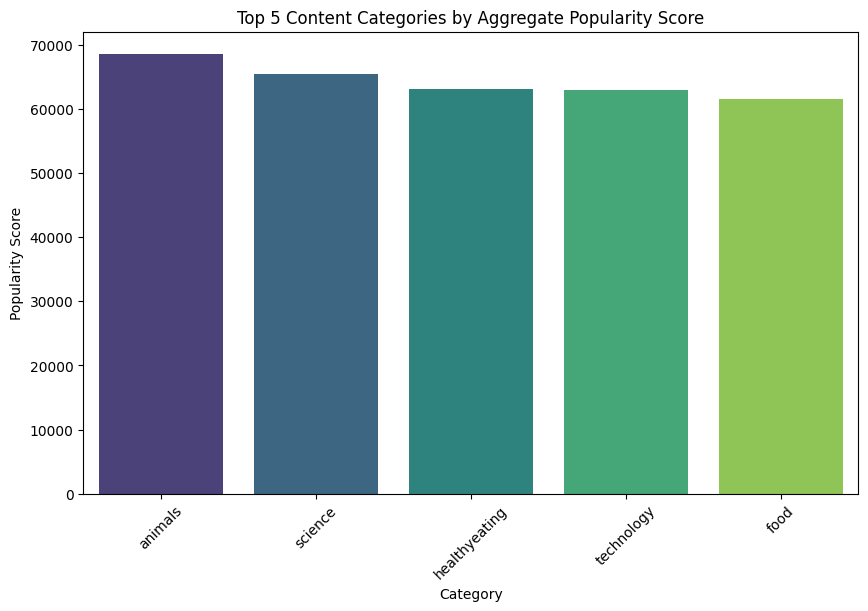

In [198]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,6))
sns.barplot (x=top5_cat.index, y=top5_cat.values, palette="viridis")
plt.title("Top 5 Content Categories by Aggregate Popularity Score")
plt.xlabel("Category")
plt.ylabel("Popularity Score")
plt.xticks(rotation=45)
plt.show()


**Insights :**

Based on the data provided, here are some insights into the top 5 content categories on Social Buzz:

1. **High Engagement in Diverse Categories**: The categories 'animals', 'science', 'healthy eating', 'technology', and 'food' are the top 5 in terms of user engagement on Social Buzz. This diversity suggests a wide range of interests among the platform's user base.
2. **Dominance of "Animals" Category**: With a score of 68,624, the 'animals' category leads in popularity. This could indicate that content related to animals resonates strongly with users, possibly due to its appealing, relatable, or entertaining nature.
3. **Strong Interest in Educational and Health-Related Content**: The presence of 'science' and 'healthy eating' among the top categories (with scores of 65,405 and 63,138, respectively) suggests that users are highly engaged with educational and health-related content. This might reflect a user base that values informative and beneficial content.
4. **Technology's Prominence Reflects Modern Trends**: The 'technology' category, scoring 63,035, underscores the importance of tech-related content. In an era where technology is rapidly evolving, this suggests that users are keen on staying updated with the latest tech trends and innovations.
5. **Food as a Popular Category**: The 'food' category, with a score of 61,598, highlights the universal appeal of food-related content. This could be due to a variety of factors, including interest in cooking, food trends, and the social aspect of food.

**Potential Implications for Social Buzz:**
- **Marketing and Partnerships**: Brands and influencers in these categories might be ideal partners for marketing collaborations.
- **Platform Development**: Features that enhance the sharing and viewing experience in these categories could be prioritized.
- **Community Building**: There's potential for building robust online communities around these popular topics, further driving engagement.

**3.2 Trend Analysis Overtime**

>  Understanding how the popularity of top 5 categories has changed over time

In [ ]:
# Convert the Datetime column into Datetime format
data['Datetime'] = pd.to_datetime(data['Datetime'])

# Set the 'Datetime' as the index
data.set_index('Datetime', inplace=True)

In [214]:
data

,Content ID,Reactions_Type,Sentiment,Score,User ID,Content_Type,Category,SentimentValue,WeightedSentiment
Datetime,,,,,,,,,
2020-11-07 09:43:50,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,negative,0,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,-1,0
2021-06-17 12:22:51,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,negative,10,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,-1,-10
2021-04-18 05:13:58,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,negative,15,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,-1,-15
2021-01-06 19:13:01,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,negative,0,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,-1,0
2020-08-23 12:25:58,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,positive,30,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,1,30
...,...,...,...,...,...,...,...,...,...
2020-10-31 04:50:14,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,negative,12,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology,-1,-12
2020-06-27 09:46:48,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,negative,10,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology,-1,-10
2021-02-16 17:17:02,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,positive,45,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology,1,45


In [215]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22534 entries, 2020-11-07 09:43:50 to 2021-01-04 04:55:11
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Content ID         22534 non-null  object
 1   Reactions_Type     22534 non-null  object
 2   Sentiment          22534 non-null  object
 3   Score              22534 non-null  int64 
 4   User ID            22534 non-null  object
 5   Content_Type       22534 non-null  object
 6   Category           22534 non-null  object
 7   SentimentValue     22534 non-null  int64 
 8   WeightedSentiment  22534 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 1.7+ MB


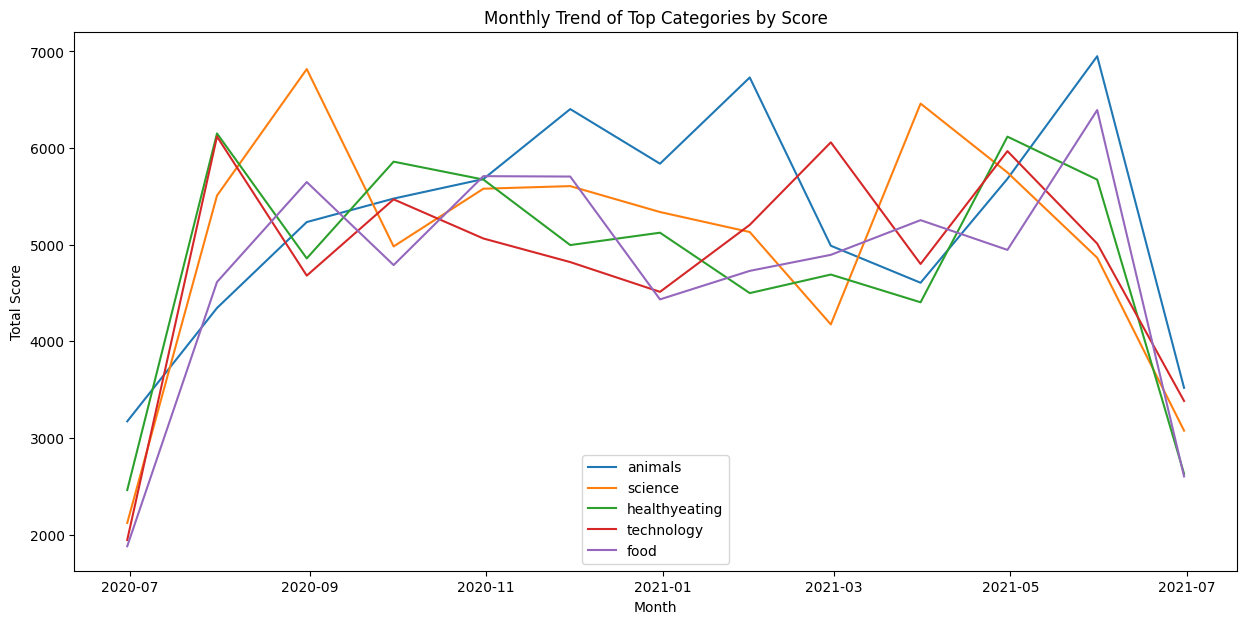

In [218]:
# Group the data by 'Category', resample by month, and get the sum of 'Score'
monthly_scores = data.groupby('Category').resample('M')['Score'].sum()

# Reset the index so that 'Category' and 'Datetime' are columns again
monthly_scores = monthly_scores.reset_index()

# Pivot the table for plotting
pivot_data = monthly_scores.pivot(index='Datetime', columns='Category', values='Score')

# Get the top 5 categories based on the total score
top_categories = pivot_data.sum().nlargest(5).index

# Plotting the trends for each of the top categories
plt.figure(figsize=(15, 7))
for category in top_categories:
    plt.plot(pivot_data.index, pivot_data[category], label=category)

plt.title('Monthly Trend of Top Categories by Score')
plt.xlabel('Month')
plt.ylabel('Total Score')
plt.legend()
plt.show()

**Insights :**

1. **Fluctuating Popularity**: Each of the top 5 categories (animals, science, healthy eating, technology, and food) shows fluctuations in popularity over time. This could be due to various factors such as seasonal interests, current events, or changes in user demographics.
2. **Initial Growth**: There is an initial increase in scores for all categories, which suggests growing engagement or increasing user base during the period from July 2020 to around August 2020.
3. **Mid-Term Declines and Peaks**: Following the initial growth, there are declines and peaks which could indicate cyclic trends or responses to specific events or campaigns. For example, the 'science' category shows a significant peak around September 2020, which could be associated with a specific event or content release that garnered a lot of user interaction.
4. **Convergence and Divergence**: The categories tend to converge around certain points (e.g., October 2020 and May 2021), suggesting similar levels of engagement across different types of content. Conversely, there are periods where the categories diverge significantly, indicating varying levels of user engagement.
5. **Downward Trend Towards the End**: There is a noticeable downward trend in total scores for all categories towards the end of the timeframe (around July 2021). This could be due to a seasonal dip, a change in platform dynamics, or external factors affecting user interaction.

**Recommendations and Considerations:**
- **Content Strategy Review**: Analyze the content released during the peaks and troughs to determine what drives engagement in each category.
- **Seasonal Campaign Planning**: If the trends align with seasonal patterns, consider planning campaigns to capitalize on peak engagement times.
- **User Engagement Analysis**: Investigate whether the downward trend is due to changes in user behavior, platform updates, or external factors.
- **Engagement Boosting Initiatives**: For months with lower scores, consider engagement-boosting initiatives, such as targeted content, promotions, or user incentives.
- **Further Breakdown**: Break down the analysis further to see if specific sub-categories or types of posts within these main categories are particularly responsible for the trends.

**3.3 Contents Sentiment Analysis**

In [201]:
# Mapping sentiments to numerical values
sentiment_map = {'positive': 1, 'neutral': 0, 'negative': -1}
data['SentimentValue'] = data['Sentiment'].map(sentiment_map)

In [202]:
data

,Content ID,Reactions_Type,Datetime,Sentiment,Score,User ID,Content_Type,Category,SentimentValue,WeightedSentiment
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,negative,0,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,-1,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,negative,10,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,-1,-10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,negative,15,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,-1,-15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,negative,0,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,-1,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,positive,30,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,1,30
...,...,...,...,...,...,...,...,...,...,...
22529,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-10-31 04:50:14,negative,12,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology,-1,-12
22530,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27 09:46:48,negative,10,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology,-1,-10
22531,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16 17:17:02,positive,45,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology,1,45
22532,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04 20:08:31,negative,12,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology,-1,-12


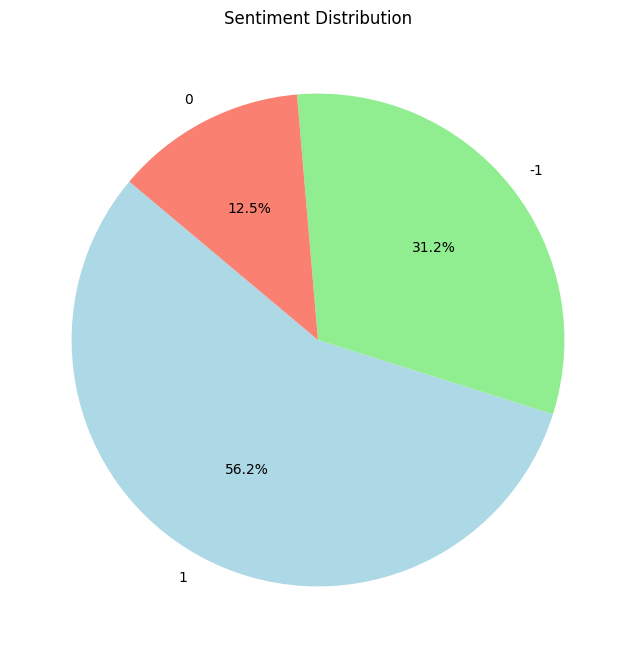

SentimentValue
 1    12674
-1     7037
 0     2823
Name: count, dtype: int64

In [205]:
# Calculate the frequency of each sentiment value
sentiment_counts = data['SentimentValue'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'salmon'])
plt.title('Sentiment Distribution')
plt.show()

sentiment_counts

**Insights :**

Based on the sentiment value counts (1 = Positive ; 0 =  Neutral ; -1 = Negative), here are some insights:
1. **Predominance of Positive Sentiment**: The majority of the reactions (12,674 out of 22,534, which is approximately 56.2%) are positive (SentimentValue = 1). This suggests that the overall user engagement on Social Buzz is predominantly favorable, with users more frequently reacting in a way that is considered positive.
2. **Significant Presence of Negative Sentiment**: There is also a substantial number of negative reactions (7,037 out of 22,534, approximately 31.2%). While less than the positive reactions, this number is significant and indicates that a notable portion of the content elicits negative responses from users.
3. **Neutral Sentiment as the Minority**: Neutral reactions (SentimentValue = 0) are the least common (2,823 out of 22,534, around 12.5%). This could imply that users on Social Buzz tend to have more definitive opinions (either positive or negative) about the content, rather than being indifferent or neutral.

**Potential Implications for Social Buzz:**

- **Content Strategy**: The high number of positive reactions is encouraging and suggests that the content strategy is largely successful in engaging users positively. However, the notable amount of negative sentiment could be an area to explore for improvement. Understanding the nature of content that elicits negative responses could help refine content strategies.
- **User Experience and Engagement**: The significant positive engagement is a good sign for user satisfaction. However, addressing the aspects that lead to negative reactions might improve the overall user experience.
- **Feedback for Content Creators**: The data provides valuable feedback for content creators on the platform. Emphasizing the types of content that receive positive reactions and understanding the context of negative reactions can guide content creation.
- **Sentiment Analysis in Product Development**: For future platform enhancements, incorporating automated sentiment analysis could help in real-time content moderation and recommendation.

**3.4 Heatmap of Sentiment Correlations with Content Types and Categories**

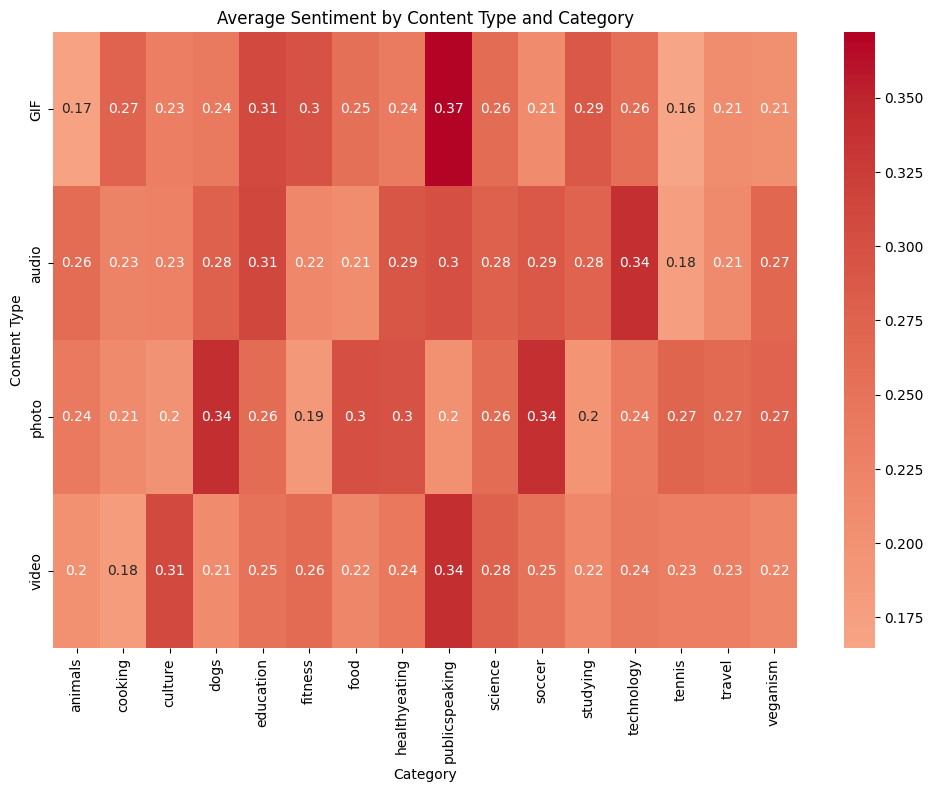

In [206]:
# Calculate the average sentiment for each combination of Content_Type and Category
pivot_table = data.pivot_table(index='Content_Type', columns='Category', values='SentimentValue', aggfunc='mean')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', center=0)
plt.title('Average Sentiment by Content Type and Category')
plt.xlabel('Category')
plt.ylabel('Content Type')
plt.show()

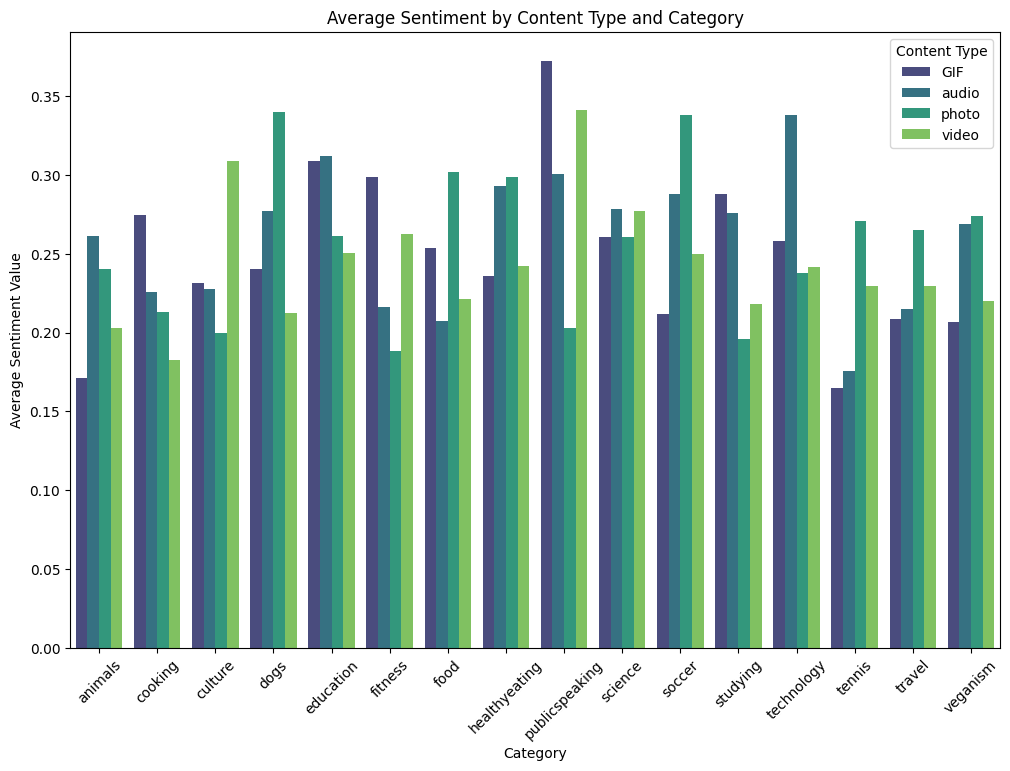

In [207]:
# Calculate the average sentiment for each combination of Content_Type and Category
grouped_data = data.groupby(['Content_Type', 'Category'])['SentimentValue'].mean().reset_index()

# Create the grouped bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Category', y='SentimentValue', hue='Content_Type', data=grouped_data, palette='viridis')
plt.title('Average Sentiment by Content Type and Category')
plt.xlabel('Category')
plt.ylabel('Average Sentiment Value')
plt.xticks(rotation=45)
plt.legend(title='Content Type')
plt.show()

**Insights :**

Based on the sentiment value counts (1 = Positive ; 0 =  Neutral ; -1 = Negative), and its correlations towards content types and categories, we can provide several insights using heatmap and bar chart visualizations. And insights obtained from those visualizations are :

1. **Overall Sentiment**: The bar chart confirms that the sentiment is generally positive across most categories and content types, with no categories having an average sentiment value below 0.15.
2. **High Performing Categories**: Categories such as education, healthy eating, science, and technology perform well across multiple content types, suggesting these categories resonate well with the audience.
3. **Content Strategy Optimization**: Information in sentiment across categories and content types can help enhancing content strategy. For instance, focusing on audio or videos for science-related contents could be a good strategy as they have higher values.
4. **Potential for Engagement Improvement**: Categories with lower sentiment values, especially for specific content types, represent areas where there may be room for engagement improvement. For instance, tennis and travel could benefit from a strategic review to understand why these categories underperform in sentiment compared to others.

**3.5 Active Users Analysis Over Time**

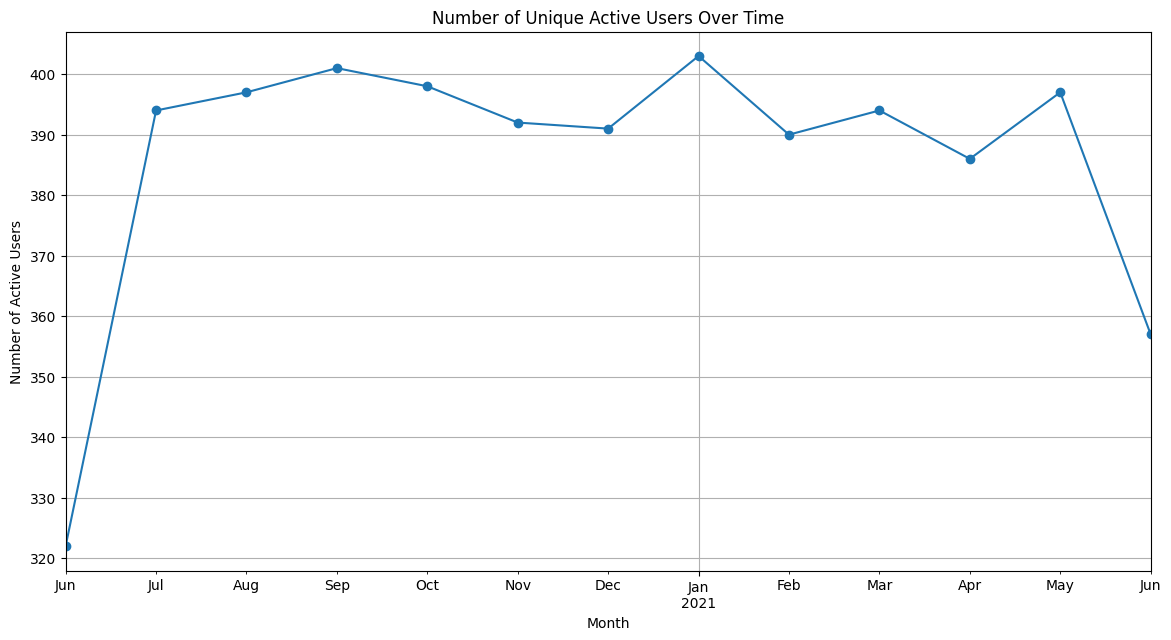

In [219]:
# Resample the data to the desired time period (e.g., 'M' for monthly) and count unique users
active_users = data['User ID'].resample('M').nunique()

# Plotting the number of active users over time
plt.figure(figsize=(14, 7))
active_users.plot(kind='line', marker='o')

plt.title('Number of Unique Active Users Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Active Users')
plt.grid(True)
plt.show()

**Insights :**

Based on the line graph depicting the number of unique active users over time, here are some insights:

1. **Initial User Growth**: There is a sharp increase from June to September, which suggests a successful user acquisition phase or an event that significantly boosted active users engagement.
2. **Stability in User Base**: From July to the following January, there is relative stability in the number of active users, with minor fluctuations. This could indicate a consistent user engagement strategy that maintains user interest.
3. **Seasonal Variations**: The small dips and rises could be indicative of seasonal trends or periodic events that affect user activity. For instance, a dip in October might correspond to a holiday period or a seasonal event.
4. **Sudden Decline**: There's a notable drop in active users in the final month (June). This could be due to several factors, such as changes in the platform, a lapse in user retention efforts, or external factors that might have influenced user activity negatively.
5. **Peak User Activity**: The peaks in user activity, especially those in September and January, could correlate with specific campaigns or content that was particularly engaging. These periods would be worth investigating to replicate successful strategies.

**Strategic Implications:**
- **User Retention Analysis**: Investigating the cause behind the drop in active users is crucial. If it's due to platform changes, user feedback can inform improvements. If it's external, it may be a broader trend that requires strategic adaptation.
- **Content and Campaign Alignment**: Review content and marketing campaigns launched during the peaks to understand what drives engagement and consider how these strategies can be applied to other periods.
- **Engagement Strategies**: For the periods of decline, especially the sharp drop at the end, it's important to analyze user behavior and feedback to develop strategies to re-engage lapsed users.
- **Seasonality Planning**: Identify if there's a pattern that suggests seasonality, and plan your content, features, and marketing efforts accordingly to maintain engagement throughout the year.

## **IV. Conclusions**
The analysis of Social Buzz's data has revealed several key insights into Top Popular Categories, user engagement, and sentiment across different content categories. It has been observed that:
- The categories 'animals', 'science', 'healthy eating', 'technology', and 'food' are the top 5 in terms of user engagement on Social Buzz
- Certain content categories consistently engage users more positively than others.
- Information of users reactions/sentiments across categories and content types can help enhancing content strategy
- The number of unique active users shows both stability and variability, indicating both successful user retention strategies and areas needing attention.
- Seasonal trends and specific events seem to have a noticeable impact on user engagement.

### Limitations:
The analysis faced several limitations that could affect the conclusions drawn:
- The dataset may not capture the complete picture of user engagement due to potential missing data or unrecorded user interactions during several campaigns.
- The user base's response to platform changes or external factors was not within the scope of this analysis.

### Challenges:
During the course of the project, the team encountered challenges such as:
- Handling missing or inconsistent data, particularly in user activity logs.
- Interpreting the sentiment associated with complex reactions beyond simple positive or negative dichotomies.
- Adapting to abrupt changes in user activity that were not immediately explainable with available data.

### Achievements:
Despite the challenges, the project achieved several milestones:
- Established a clear understanding of which content categories are most engaging on Social Buzz.
- Identified content types that are most likely to elicit positive user sentiment.
- Tracked and visualized user activity trends over time to identify patterns of engagement.

### Recommendations:
Based on the findings, the following strategic recommendations are proposed:
- Increase the production and promotion of content in high-engagement categories, particularly using GIFs and videos.
- Investigate the cause of the recent drop in active users and develop targeted re-engagement campaigns.
- Plan for seasonal content and marketing strategies in anticipation of engagement fluctuations throughout the year.

### Summary:
The project provided valuable insights into Social Buzz's user engagement dynamics. It highlighted the content categories and types that resonate best with users and pinpointed the times when user activity was at its peak. Although the data presented some limitations and the analysis encountered challenges, the achievements offer actionable insights for the platform to enhance user experience and engagement. Going forward, the recommendations focus on leveraging the insights gained to bolster user activity and retention, while continuously refining the data analysis process to adapt to the platform's evolving needs.